## Slepian-Wolf Coding Demo

Author: Cheuk Ting Li  

In [1]:
from psitip import *
PsiOpts.setting(solver = "pyomo.glpk")     # Set linear programming solver
PsiOpts.setting(repr_latex = True)         # Jupyter Notebook LaTeX display
PsiOpts.setting(venn_latex = True)         # LaTeX in diagrams
PsiOpts.setting(proof_note_color = "blue") # Reasons in proofs are blue

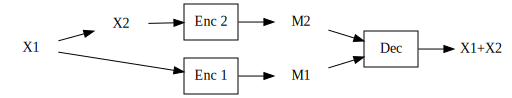

In [2]:
X1, X2 = rv_array("X", 1, 3)
M1, M2 = rv_array("M", 1, 3)
R1, R2 = real_array("R", 1, 3)

model = CodingModel()        # Define Slepian-Wolf coding setting
model.set_rate(M1, R1)       # The rate of M1, M2 are R1, R2 resp.
model.set_rate(M2, R2)
model.add_edge(X1, X2)       # X1, X2 are correlated source
model.add_node(X1, M1,
            label = "Enc 1") # Encoder 1 maps X1 to M1
model.add_node(X2, M2,
            label = "Enc 2") # Encoder 2 maps X2 to M2
model.add_node(M1+M2, X1+X2,
            label = "Dec")   # Decoder maps M1,M2 to X1,X2

model.graph()                # Draw diagram

In [3]:
r = model.get_inner()  # Automatic inner bound, gives [Slepian-Wolf 1973]
r

( ( R1 >= H(X1|X2) )
 &( R2 >= H(X2|X1) )
 &( R1+R2 >= H(X1+X2) ) )

In [4]:
# Automatic outer bound with 0 auxiliary, gives [Slepian-Wolf 1973]
model.get_outer(0)

( ( R1 >= H(X1|X2) )
 &( R2 >= H(X2|X1) )
 &( R1+R2 >= H(X1+X2) ) )

In [5]:
bool(model.get_outer() >> r)   # Converse proof

True

In [6]:
# Output converse proof (is_proof = True for shorter proof)
(model.get_outer(is_proof = True) >> r).proof()

### References
- A. El Gamal and Y.-H. Kim, _Network Information Theory_, Cambridge University Press, 2011, Ch. 10.
-  D. Slepian and J. K. Wolf, "Noiseless coding of correlated information sources," IEEE Trans. Inf. Theory, vol. IT-19, no. 4, pp. 471–480, Jul. 1973.
